In [1]:
from manual_log_reg import ManualLogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
X = pd.read_csv('X_data.csv')
X.drop(columns=X.columns[0], axis=1, inplace=True)
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [3]:
y = pd.read_csv('y_data.csv')  # read and convert to numpy
y.drop(columns=y.columns[0], axis=1, inplace=True)
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [4]:
X = X.values  # convert to numpy
y = y.values.astype(int).flatten()  # convert to numpy integers and flatten
# X = np.concatenate((np.ones((len(y), 1)), X), axis=1) # add bias term - bias term added after Test Train split and scaling, according to the updated instructions.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=336546)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.concatenate((np.ones((len(y_train), 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((len(y_test), 1)), X_test), axis=1)

Implement the functions in manual_log_reg.py and train *log_reg* below. Use the *plot* flag in order to show reasonable learning (decrease of the training loss as a function of the iterations). Don't forget to make minor preprocessing so that gradient descent will be stable.

In [7]:
log_reg = ManualLogisticRegression()

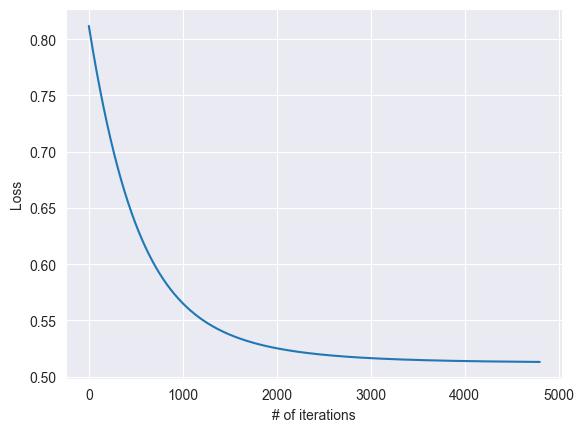

In [8]:
log_reg.fit(X_train,y_train,plot=True)

Sort the learned weights (excluding the bias term). Which of the features is the most important one?

In [9]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
feats = {0:'bias', 1:'Age', 2:'Systolic_BP', 3:'Diastolic_BP', 4:'Cholesterol'}
sorted_weights = np.argsort(log_reg.w)[::-1]
print("The most important feature according to the learned weights is: '{}'".format(feats[sorted_weights[0]]))
# --------------------------------------------------------------------------------------

The most important feature according to the learned weights is: 'Age'


Report the performance on the "correct dataset" using *conf_matrix* function. The required metrics are: TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 and AUC. You may use functions seen in the tutorial but notice that one of the metrics can and should be called from *log_reg* itself.

In [10]:
y_pred_proba_test = log_reg.predict_proba(X_test)
y_pred_test = log_reg.predict(X_test)
conf_mat = log_reg.conf_matrix(X_test, y_test)
print('Confusion matrix:\n' ,conf_mat)

Confusion matrix:
 [[445 166]
 [139 450]]


In [11]:
TP = conf_mat[1][1]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TN = conf_mat[0][0]
Se = TP/(TP+FN)
Sp = TN/(TN+FP)
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
F1 = 2*PPV*Se/(PPV+Se)
Acc = (np.sum((y_pred_test==y_test) * 1)/(len(y_test))) * 100
auroc = roc_auc_score(y_test,y_pred_proba_test)

In [12]:
labels = ['TN','FP','FN','TP','Se','Sp','PPV','NPV','ACC','F1','AUROC']
metrics = [TN,FP,FN,TP,Se,Sp,PPV,NPV,Acc,F1,auroc]
for i,metric in enumerate(metrics):
    if metric in [TN,FP,FN,TP]:
        print('{} Values : {:.2f}'.format(labels[i],metric))
    else:
        print('{} Score is: {:.2f}'.format(labels[i],metric)) if metric != Acc else print('{} Score is: {:.2f}%'.format(labels[i],metric))

TN Values : 445.00
FP Values : 166.00
FN Values : 139.00
TP Values : 450.00
Se Score is: 0.76
Sp Score is: 0.73
PPV Score is: 0.73
NPV Score is: 0.76
ACC Score is: 74.58%
F1 Score is: 0.75
AUROC Score is: 0.81
